In [1]:
import pandas as pd
from rdkit import Chem
import seaborn as sns
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt


# Combining data

Combining datasets

In [2]:
# drop the rest 
keep_cols_all = ["CANONICAL_SMILES", "INCHIKEY", "active", "dataset", "data_type", "common_name", "action_type"]


# XinXu ADME NCATS

In [3]:
xinxu = pd.read_csv("processed/xin_xu_ncats_adme.csv")

In [4]:
xinxu.head()

,SMILES,CYP2C9 Substrate Class,CYP2D6 Substrate Class,CYP3A4 Substrate Class,CYP2C9 Activity Class,CYP2D6 Activity Class,CYP3A4 Activity Class,CYP2C9 Inhibitor Class,CYP2D6 Inhibitor Class,CYP3A4_ Inhibitor Class,CANONICAL_SMILES,INCHIKEY,dataset,data_type,action_type,active,common_name
0,CC(C)(C)C1=C(O)C=CC(O)=C1,0.0,0.0,0.0,0.0,0.0,1.0,0,0,1,CC(C)(C)c1cc(O)ccc1O,BGNXCDMCOKJUMV-UHFFFAOYSA-N,XinXu_NCATS_ADME_raw,assay,substrate,False,NaN
1,OC(=O)C\C(=C/C(O)=O)C(O)=O,NaN,0.0,NaN,0.0,0.0,0.0,NaN,0,NaN,O=C(O)C=C(CC(=O)O)C(=O)O,GTZCVFVGUGFEME-UHFFFAOYSA-N,XinXu_NCATS_ADME_raw,assay,substrate,False,NaN
2,CC(C)=CCC\C(C)=C\CO,0.0,1.0,0.0,0.0,0.0,0.0,0,0,0,CC(C)=CCC/C(C)=C/CO,GLZPCOQZEFWAFX-JXMROGBWSA-N,XinXu_NCATS_ADME_raw,assay,substrate,False,NaN
3,CC1=CC(N)=C2C=C(NC(=O)NC3=CC4=C(C=C3)N=C(C)C=C...,0.0,0.0,NaN,0.0,1.0,0.0,0,1,NaN,Cc1cc(N)c2cc(NC(=O)Nc3ccc4nc(C)cc(N)c4c3)ccc2n1,HOUSDILKOJMENG-UHFFFAOYSA-N,XinXu_NCATS_ADME_raw,assay,substrate,False,NaN
4,CC1=C(O)C(CN)=C(CO)C=N1,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,Cc1ncc(CO)c(CN)c1O,NHZMQXZHNVQTQA-UHFFFAOYSA-N,XinXu_NCATS_ADME_raw,assay,substrate,False,NaN


In [5]:
xinxu_actives = xinxu.query("active == True")
xinxu_actives = xinxu_actives[keep_cols_all]
xinxu_actives

,CANONICAL_SMILES,INCHIKEY,active,dataset,data_type,common_name,action_type
7,Oc1ccc(Cl)cc1Sc1cc(Cl)ccc1O,ANUSOIHIIPAHJV-UHFFFAOYSA-N,True,XinXu_NCATS_ADME_raw,assay,NaN,substrate
8,CN(C)CC/C=C1\c2ccccc2Sc2ccc(Cl)cc21,WSPOMRSOLSGNFJ-VGOFMYFVSA-N,True,XinXu_NCATS_ADME_raw,assay,NaN,substrate
9,O=P(O)(O)OP(=O)(O)O,XPPKVPWEQAFLFU-UHFFFAOYSA-N,True,XinXu_NCATS_ADME_raw,assay,NaN,substrate
11,CCc1oc2ccccc2c1C(=O)c1cc(Br)c(O)c(Br)c1,WHQCHUCQKNIQEC-UHFFFAOYSA-N,True,XinXu_NCATS_ADME_raw,assay,NaN,substrate
17,Cc1cccc(Nc2cc(Cl)nc(SCC(=O)O)n2)c1C,SZRPDCCEHVWOJX-UHFFFAOYSA-N,True,XinXu_NCATS_ADME_raw,assay,NaN,substrate
...,...,...,...,...,...,...,...
4277,c1ccc(-c2csc(N3CCOCC3)n2)cc1,MRNNJVNMXOZEQC-UHFFFAOYSA-N,True,XinXu_NCATS_ADME_raw,assay,NaN,substrate
4281,S=C(c1ccc(-c2ccc(Cl)c(Cl)c2)o1)N1CCCCC1,SFXIAQRTVLSMEJ-UHFFFAOYSA-N,True,XinXu_NCATS_ADME_raw,assay,NaN,substrate
4286,CCCCc1c(-c2ccc(OC)cc2)[nH]c2nccnc12,WVMANZPBOBRWCB-UHFFFAOYSA-N,True,XinXu_NCATS_ADME_raw,assay,NaN,substrate
4287,C=C(C)Cn1c(SCC(=O)c2cccs2)nc2sc3c(c2c1=O)CCCC3,XAKJIQPEGSCYIP-UHFFFAOYSA-N,True,XinXu_NCATS_ADME_raw,assay,NaN,substrate


# Carbon-mangels

In [6]:
carbon_mangels = pd.read_csv("./processed/carbon-mangels_2011.csv")

In [7]:
carbon_mangels_actives = carbon_mangels.query("active == True")
carbon_mangels_actives = carbon_mangels[keep_cols_all]

In [8]:
carbon_mangels_actives

,CANONICAL_SMILES,INCHIKEY,active,dataset,data_type,common_name,action_type
0,Nc1nc(NC2CC2)c2ncn([C@H]3C=C[C@@H](CO)C3)c2n1,MCGSCOLBFJQGHM-SCZZXKLOSA-N,False,carbon-mangels_2011,assay,abacavir,substrate
1,COCc1c(C(=O)OC(C)C)ncc2[nH]c3ccc(OCc4ccccc4)cc...,RLFKILXOLJVUNF-UHFFFAOYSA-N,False,carbon-mangels_2011,assay,abecarnil,substrate
2,C[C@]12CC[C@H](O)CC1=CC[C@@H]1[C@@H]2CC[C@]2(C...,GZOSMCIZMLWJML-VJLLXTKPSA-N,False,carbon-mangels_2011,assay,abiraterone,substrate
3,CCCC(=O)Nc1ccc(OC[C@@H](O)CNC(C)C)c(C(C)=O)c1,GOEMGAFJFRBGGG-HNNXBMFYSA-N,False,carbon-mangels_2011,assay,acebutolol,substrate
4,O=C(O)COC(=O)Cc1ccccc1Nc1c(Cl)cccc1Cl,MNIPYSSQXLZQLJ-UHFFFAOYSA-N,True,carbon-mangels_2011,assay,aceclofenac,substrate
...,...,...,...,...,...,...,...
664,Cc1ccc(-c2nc3ccc(C)cn3c2CC(=O)N(C)C)cc1,ZAFYATHCZYHLPB-UHFFFAOYSA-N,True,carbon-mangels_2011,assay,zolpidem,substrate
665,NS(=O)(=O)Cc1noc2ccccc12,UBQNRHZMVUUOMG-UHFFFAOYSA-N,False,carbon-mangels_2011,assay,zonisamide,substrate
666,CN1CCN(C(=O)O[C@H]2c3nccnc3C(=O)N2c2ccc(Cl)cn2...,GBBSUAFBMRNDJC-INIZCTEOSA-N,True,carbon-mangels_2011,assay,zopiclone,substrate
667,CN(C)CCOC1=Cc2ccccc2Sc2ccc(Cl)cc21,HDOZVRUNCMBHFH-UHFFFAOYSA-N,False,carbon-mangels_2011,assay,zotepine,substrate


# Chembl

There is only a single set of compounds in ChEMBL with substrate activity explicitly marked 



In [9]:
chembl_actives = pd.read_csv("processed/chembl_active.csv")
chembl_actives.head()

,CANONICAL_SMILES,INCHIKEY,common_name,action_type,dataset,active
0,CCCCNC(=O)NS(=O)(=O)c1ccc(C)cc1,JLRGJRBPOGGCBT-UHFFFAOYSA-N,TOLBUTAMIDE,substrate,ChEMBL_curated,True
1,O=C1NC(=O)C(c2ccccc2)(c2ccccc2)N1,CXOFVDLJLONNDW-UHFFFAOYSA-N,PHENYTOIN,substrate,ChEMBL_curated,True
2,CC(C(=O)O)c1ccc(-c2ccccc2)c(F)c1,SYTBZMRGLBWNTM-UHFFFAOYSA-N,FLURBIPROFEN,substrate,ChEMBL_curated,True
3,CNCCC(Oc1ccc(C(F)(F)F)cc1)c1ccccc1,RTHCYVBBDHJXIQ-UHFFFAOYSA-N,FLUOXETINE,substrate,ChEMBL_curated,True
4,O=C(O)Cc1ccccc1Nc1c(Cl)cccc1Cl,DCOPUUMXTXDBNB-UHFFFAOYSA-N,DICLOFENAC,substrate,ChEMBL_curated,True


# FDA approved

Compounds the FDA really reccomends you try

In [10]:
fda = pd.read_csv("./FDA/fda.csv")

In [11]:
fda

,CANONICAL_SMILES,active,common_name,action_type,FDA_recommended,dataset,INCHIKEY
0,C1=CC=C(C(=C1)CC(=O)O)NC2=C(C=CC=C2Cl)Cl,True,diclofenac,substrate,True,FDA,DCOPUUMXTXDBNB-UHFFFAOYSA-N
1,CC(=O)C[C@@H](C1=CC=CC=C1)C2=C(C3=CC=CC=C3OC2=O)O,True,(S)-wafarin,substrate,True,FDA,PJVWKTKQMONHTI-HNNXBMFYSA-N
2,CCCCNC(=O)NS(=O)(=O)C1=CC=C(C=C1)C,True,tolbutamide,substrate,True,FDA,JLRGJRBPOGGCBT-UHFFFAOYSA-N


# Flockheart table

In [12]:
flockheart = pd.read_csv("./processed/flockheart.csv")
flockheart.drop(columns="SMILES", inplace=True)

# Combine everything


## NOTE

common name being blank is not that these compounds do not have a common name, but that they need to be pulled from pubchem

In [13]:
combined_literature = pd.concat([xinxu_actives, carbon_mangels_actives, fda, flockheart, chembl_actives])
combined_literature

,CANONICAL_SMILES,INCHIKEY,active,dataset,data_type,common_name,action_type,FDA_recommended
7,Oc1ccc(Cl)cc1Sc1cc(Cl)ccc1O,ANUSOIHIIPAHJV-UHFFFAOYSA-N,True,XinXu_NCATS_ADME_raw,assay,NaN,substrate,NaN
8,CN(C)CC/C=C1\c2ccccc2Sc2ccc(Cl)cc21,WSPOMRSOLSGNFJ-VGOFMYFVSA-N,True,XinXu_NCATS_ADME_raw,assay,NaN,substrate,NaN
9,O=P(O)(O)OP(=O)(O)O,XPPKVPWEQAFLFU-UHFFFAOYSA-N,True,XinXu_NCATS_ADME_raw,assay,NaN,substrate,NaN
11,CCc1oc2ccccc2c1C(=O)c1cc(Br)c(O)c(Br)c1,WHQCHUCQKNIQEC-UHFFFAOYSA-N,True,XinXu_NCATS_ADME_raw,assay,NaN,substrate,NaN
17,Cc1cccc(Nc2cc(Cl)nc(SCC(=O)O)n2)c1C,SZRPDCCEHVWOJX-UHFFFAOYSA-N,True,XinXu_NCATS_ADME_raw,assay,NaN,substrate,NaN
...,...,...,...,...,...,...,...,...
1,O=C1NC(=O)C(c2ccccc2)(c2ccccc2)N1,CXOFVDLJLONNDW-UHFFFAOYSA-N,True,ChEMBL_curated,NaN,PHENYTOIN,substrate,NaN
2,CC(C(=O)O)c1ccc(-c2ccccc2)c(F)c1,SYTBZMRGLBWNTM-UHFFFAOYSA-N,True,ChEMBL_curated,NaN,FLURBIPROFEN,substrate,NaN
3,CNCCC(Oc1ccc(C(F)(F)F)cc1)c1ccccc1,RTHCYVBBDHJXIQ-UHFFFAOYSA-N,True,ChEMBL_curated,NaN,FLUOXETINE,substrate,NaN
4,O=C(O)Cc1ccccc1Nc1c(Cl)cccc1Cl,DCOPUUMXTXDBNB-UHFFFAOYSA-N,True,ChEMBL_curated,NaN,DICLOFENAC,substrate,NaN


In [14]:
# combined_literature["FDA_recommended"] = combined_literature["FDA_recommended"].fillna(False)

In [15]:
combined_literature.INCHIKEY.duplicated().sum()  # close same result with SMILES

98

In [16]:
combined_literature.dropna(subset="INCHIKEY", inplace=True)

In [17]:
combined_literature_chembl = combined_literature

In [18]:
combined_literature_chembl.FDA_recommended.value_counts()

FDA_recommended
True    3
Name: count, dtype: int64

In [19]:
combined_literature_chembl.dataset.value_counts()

dataset
XinXu_NCATS_ADME_raw    1126
carbon-mangels_2011      669
flockheart                46
ChEMBL_curated             6
FDA                        3
Name: count, dtype: int64

In [20]:
combined_literature_chembl.INCHIKEY.duplicated().sum()

98

In [21]:
combined_literature_chembl.INCHIKEY.isna().sum()

0

In [22]:
combined_literature_chembl

,CANONICAL_SMILES,INCHIKEY,active,dataset,data_type,common_name,action_type,FDA_recommended
7,Oc1ccc(Cl)cc1Sc1cc(Cl)ccc1O,ANUSOIHIIPAHJV-UHFFFAOYSA-N,True,XinXu_NCATS_ADME_raw,assay,NaN,substrate,NaN
8,CN(C)CC/C=C1\c2ccccc2Sc2ccc(Cl)cc21,WSPOMRSOLSGNFJ-VGOFMYFVSA-N,True,XinXu_NCATS_ADME_raw,assay,NaN,substrate,NaN
9,O=P(O)(O)OP(=O)(O)O,XPPKVPWEQAFLFU-UHFFFAOYSA-N,True,XinXu_NCATS_ADME_raw,assay,NaN,substrate,NaN
11,CCc1oc2ccccc2c1C(=O)c1cc(Br)c(O)c(Br)c1,WHQCHUCQKNIQEC-UHFFFAOYSA-N,True,XinXu_NCATS_ADME_raw,assay,NaN,substrate,NaN
17,Cc1cccc(Nc2cc(Cl)nc(SCC(=O)O)n2)c1C,SZRPDCCEHVWOJX-UHFFFAOYSA-N,True,XinXu_NCATS_ADME_raw,assay,NaN,substrate,NaN
...,...,...,...,...,...,...,...,...
1,O=C1NC(=O)C(c2ccccc2)(c2ccccc2)N1,CXOFVDLJLONNDW-UHFFFAOYSA-N,True,ChEMBL_curated,NaN,PHENYTOIN,substrate,NaN
2,CC(C(=O)O)c1ccc(-c2ccccc2)c(F)c1,SYTBZMRGLBWNTM-UHFFFAOYSA-N,True,ChEMBL_curated,NaN,FLURBIPROFEN,substrate,NaN
3,CNCCC(Oc1ccc(C(F)(F)F)cc1)c1ccccc1,RTHCYVBBDHJXIQ-UHFFFAOYSA-N,True,ChEMBL_curated,NaN,FLUOXETINE,substrate,NaN
4,O=C(O)Cc1ccccc1Nc1c(Cl)cccc1Cl,DCOPUUMXTXDBNB-UHFFFAOYSA-N,True,ChEMBL_curated,NaN,DICLOFENAC,substrate,NaN


In [23]:
appears = combined_literature_chembl.groupby("INCHIKEY")["dataset"].nunique().reset_index(name="appears_in_N_datasets")
appears.set_index("INCHIKEY")

,appears_in_N_datasets
INCHIKEY,
AABFWJDLCCDJJN-UHFFFAOYSA-N,1
AADCDMQTJNYOSS-LBPRGKRZSA-N,1
AAOVKJBEBIDNHE-UHFFFAOYSA-N,1
AATMNHPDEZNXEK-UHFFFAOYSA-N,1
ABJKWBDEJIDSJZ-UHFFFAOYSA-N,1
...,...
ZWSQPDKVZSFQEV-UHFFFAOYSA-N,1
ZXBHFWFKSIYJEK-MFJOXFORSA-N,1
ZYGHJZDHTFUPRJ-UHFFFAOYSA-N,1


In [24]:
appears.isna().sum()

INCHIKEY                 0
appears_in_N_datasets    0
dtype: int64

<Axes: xlabel='appears_in_N_datasets', ylabel='count'>

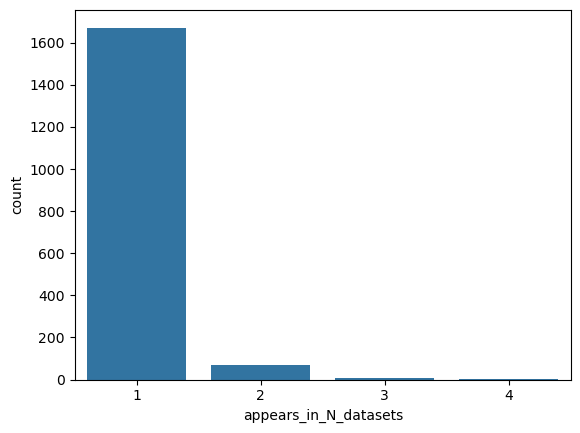

In [25]:
sns.countplot(data=appears, x="appears_in_N_datasets")

In [26]:
combined_literature_chembl_w_counts = combined_literature_chembl.merge(appears, on="INCHIKEY")
combined_literature_chembl_w_counts

,CANONICAL_SMILES,INCHIKEY,active,dataset,data_type,common_name,action_type,FDA_recommended,appears_in_N_datasets
0,Oc1ccc(Cl)cc1Sc1cc(Cl)ccc1O,ANUSOIHIIPAHJV-UHFFFAOYSA-N,True,XinXu_NCATS_ADME_raw,assay,NaN,substrate,NaN,1
1,CN(C)CC/C=C1\c2ccccc2Sc2ccc(Cl)cc21,WSPOMRSOLSGNFJ-VGOFMYFVSA-N,True,XinXu_NCATS_ADME_raw,assay,NaN,substrate,NaN,1
2,O=P(O)(O)OP(=O)(O)O,XPPKVPWEQAFLFU-UHFFFAOYSA-N,True,XinXu_NCATS_ADME_raw,assay,NaN,substrate,NaN,1
3,CCc1oc2ccccc2c1C(=O)c1cc(Br)c(O)c(Br)c1,WHQCHUCQKNIQEC-UHFFFAOYSA-N,True,XinXu_NCATS_ADME_raw,assay,NaN,substrate,NaN,2
4,Cc1cccc(Nc2cc(Cl)nc(SCC(=O)O)n2)c1C,SZRPDCCEHVWOJX-UHFFFAOYSA-N,True,XinXu_NCATS_ADME_raw,assay,NaN,substrate,NaN,1
...,...,...,...,...,...,...,...,...,...
1845,O=C1NC(=O)C(c2ccccc2)(c2ccccc2)N1,CXOFVDLJLONNDW-UHFFFAOYSA-N,True,ChEMBL_curated,NaN,PHENYTOIN,substrate,NaN,3
1846,CC(C(=O)O)c1ccc(-c2ccccc2)c(F)c1,SYTBZMRGLBWNTM-UHFFFAOYSA-N,True,ChEMBL_curated,NaN,FLURBIPROFEN,substrate,NaN,3
1847,CNCCC(Oc1ccc(C(F)(F)F)cc1)c1ccccc1,RTHCYVBBDHJXIQ-UHFFFAOYSA-N,True,ChEMBL_curated,NaN,FLUOXETINE,substrate,NaN,2
1848,O=C(O)Cc1ccccc1Nc1c(Cl)cccc1Cl,DCOPUUMXTXDBNB-UHFFFAOYSA-N,True,ChEMBL_curated,NaN,DICLOFENAC,substrate,NaN,4


In [27]:
df_dummies = pd.get_dummies(combined_literature_chembl_w_counts['dataset'], prefix='dataset').join(combined_literature_chembl_w_counts["INCHIKEY"])
df_dummies

,dataset_ChEMBL_curated,dataset_FDA,dataset_XinXu_NCATS_ADME_raw,dataset_carbon-mangels_2011,dataset_flockheart,INCHIKEY
0,False,False,True,False,False,ANUSOIHIIPAHJV-UHFFFAOYSA-N
1,False,False,True,False,False,WSPOMRSOLSGNFJ-VGOFMYFVSA-N
2,False,False,True,False,False,XPPKVPWEQAFLFU-UHFFFAOYSA-N
3,False,False,True,False,False,WHQCHUCQKNIQEC-UHFFFAOYSA-N
4,False,False,True,False,False,SZRPDCCEHVWOJX-UHFFFAOYSA-N
...,...,...,...,...,...,...
1845,True,False,False,False,False,CXOFVDLJLONNDW-UHFFFAOYSA-N
1846,True,False,False,False,False,SYTBZMRGLBWNTM-UHFFFAOYSA-N
1847,True,False,False,False,False,RTHCYVBBDHJXIQ-UHFFFAOYSA-N
1848,True,False,False,False,False,DCOPUUMXTXDBNB-UHFFFAOYSA-N


In [28]:
df_result = df_dummies.groupby('INCHIKEY').max().reset_index()
df_result = df_result.set_index("INCHIKEY")

In [29]:
# cat_dataname = combined_literature_chembl.groupby("INCHIKEY")["dataset"].apply(lambda x: "_+_".join(x)).reset_index(name="dataset_comb").set_index("INCHIKEY")
# cat_dataname

In [30]:
combined_literature_chembl_w_counts = combined_literature_chembl_w_counts.merge(df_result, on="INCHIKEY")
combined_literature_chembl_w_counts

,CANONICAL_SMILES,INCHIKEY,active,dataset,data_type,common_name,action_type,FDA_recommended,appears_in_N_datasets,dataset_ChEMBL_curated,dataset_FDA,dataset_XinXu_NCATS_ADME_raw,dataset_carbon-mangels_2011,dataset_flockheart
0,Oc1ccc(Cl)cc1Sc1cc(Cl)ccc1O,ANUSOIHIIPAHJV-UHFFFAOYSA-N,True,XinXu_NCATS_ADME_raw,assay,NaN,substrate,NaN,1,False,False,True,False,False
1,CN(C)CC/C=C1\c2ccccc2Sc2ccc(Cl)cc21,WSPOMRSOLSGNFJ-VGOFMYFVSA-N,True,XinXu_NCATS_ADME_raw,assay,NaN,substrate,NaN,1,False,False,True,False,False
2,O=P(O)(O)OP(=O)(O)O,XPPKVPWEQAFLFU-UHFFFAOYSA-N,True,XinXu_NCATS_ADME_raw,assay,NaN,substrate,NaN,1,False,False,True,False,False
3,CCc1oc2ccccc2c1C(=O)c1cc(Br)c(O)c(Br)c1,WHQCHUCQKNIQEC-UHFFFAOYSA-N,True,XinXu_NCATS_ADME_raw,assay,NaN,substrate,NaN,2,False,False,True,True,False
4,Cc1cccc(Nc2cc(Cl)nc(SCC(=O)O)n2)c1C,SZRPDCCEHVWOJX-UHFFFAOYSA-N,True,XinXu_NCATS_ADME_raw,assay,NaN,substrate,NaN,1,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1845,O=C1NC(=O)C(c2ccccc2)(c2ccccc2)N1,CXOFVDLJLONNDW-UHFFFAOYSA-N,True,ChEMBL_curated,NaN,PHENYTOIN,substrate,NaN,3,True,False,False,True,True
1846,CC(C(=O)O)c1ccc(-c2ccccc2)c(F)c1,SYTBZMRGLBWNTM-UHFFFAOYSA-N,True,ChEMBL_curated,NaN,FLURBIPROFEN,substrate,NaN,3,True,False,False,True,True
1847,CNCCC(Oc1ccc(C(F)(F)F)cc1)c1ccccc1,RTHCYVBBDHJXIQ-UHFFFAOYSA-N,True,ChEMBL_curated,NaN,FLUOXETINE,substrate,NaN,2,True,False,False,False,True
1848,O=C(O)Cc1ccccc1Nc1c(Cl)cccc1Cl,DCOPUUMXTXDBNB-UHFFFAOYSA-N,True,ChEMBL_curated,NaN,DICLOFENAC,substrate,NaN,4,True,True,False,True,True


In [31]:
combined_literature_chembl_w_counts.action_type.value_counts()

action_type
substrate    1850
Name: count, dtype: int64

In [32]:
combined_literature_chembl_w_counts.INCHIKEY.nunique()

1752

In [33]:
combined_literature_chembl_w_counts['common_name'].isna().sum()

1127

In [34]:
# we can just sort by N_datasets as no specific chembl curation to get all the chembl data at the top, then uniquify on INCHIKEY

combined_literature_chembl_w_counts.sort_values(["appears_in_N_datasets"], ascending=[False],  inplace=True)


In [35]:
# fill common name from gropupby 
combined_literature_chembl_w_counts['common_name'] = combined_literature_chembl_w_counts.groupby('INCHIKEY')['common_name'].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))


/tmp/ipykernel_40943/1877288904.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  combined_literature_chembl_w_counts['common_name'] = combined_literature_chembl_w_counts.groupby('INCHIKEY')['common_name'].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))
/tmp/ipykernel_40943/1877288904.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  combined_literature_chembl_w_counts['common_name'] = combined_literature_chembl_w_counts.groupby('INCHIKEY')['common_name'].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))


In [36]:
combined_literature_chembl_w_counts['common_name'].isna().sum()

1066

In [37]:
combined_literature_chembl_w_counts.drop(columns=["dataset","data_type"], inplace=True)

In [38]:
combined_literature_chembl_w_counts.head()

,CANONICAL_SMILES,INCHIKEY,active,common_name,action_type,FDA_recommended,appears_in_N_datasets,dataset_ChEMBL_curated,dataset_FDA,dataset_XinXu_NCATS_ADME_raw,dataset_carbon-mangels_2011,dataset_flockheart
1802,O=C(O)Cc1ccccc1Nc1c(Cl)cccc1Cl,DCOPUUMXTXDBNB-UHFFFAOYSA-N,True,diclofenac,substrate,NaN,4,True,True,False,True,True
1299,O=C(O)Cc1ccccc1Nc1c(Cl)cccc1Cl,DCOPUUMXTXDBNB-UHFFFAOYSA-N,True,diclofenac,substrate,NaN,4,True,True,False,True,True
1797,CCCCNC(=O)NS(=O)(=O)C1=CC=C(C=C1)C,JLRGJRBPOGGCBT-UHFFFAOYSA-N,True,tolbutamide,substrate,True,4,True,True,False,True,True
1840,CCCCNC(=O)NS(=O)(=O)c1ccc(C)cc1,JLRGJRBPOGGCBT-UHFFFAOYSA-N,True,tolbutamide,substrate,NaN,4,True,True,False,True,True
1844,CCCCNC(=O)NS(=O)(=O)c1ccc(C)cc1,JLRGJRBPOGGCBT-UHFFFAOYSA-N,True,TOLBUTAMIDE,substrate,NaN,4,True,True,False,True,True


In [39]:
fda_reccomends_mask = combined_literature_chembl_w_counts.INCHIKEY.isin(fda.INCHIKEY)

fda_reccomends_mask

1802     True
1299     True
1797     True
1840     True
1844     True
        ...  
664     False
663     False
662     False
660     False
674     False
Name: INCHIKEY, Length: 1850, dtype: bool

In [40]:
# combined_literature_chembl_w_counts["FDA_recommended"] = combined_literature_chembl_w_counts["FDA_recommended"][fda_reccomends_mask] = True

In [41]:
combined_literature_chembl_w_counts["FDA_recommended"] = fda_reccomends_mask

In [42]:
combined_literature_chembl_w_counts.drop_duplicates(subset="INCHIKEY", inplace=True)

In [43]:
combined_literature_chembl_w_counts["action_type"] = combined_literature_chembl_w_counts["action_type"].fillna("substrate")

In [44]:
combined_literature_chembl_w_counts["inclusion_score"] = combined_literature_chembl_w_counts["appears_in_N_datasets"].fillna(0)

In [45]:
combined_literature_chembl_w_counts.sort_values("inclusion_score", ascending=False, inplace=True)

In [46]:
combined_literature_chembl_w_counts.to_csv("final/actives_final.csv", index=False)

In [47]:
combined_literature_chembl_w_counts

,CANONICAL_SMILES,INCHIKEY,active,common_name,action_type,FDA_recommended,appears_in_N_datasets,dataset_ChEMBL_curated,dataset_FDA,dataset_XinXu_NCATS_ADME_raw,dataset_carbon-mangels_2011,dataset_flockheart,inclusion_score
1797,CCCCNC(=O)NS(=O)(=O)C1=CC=C(C=C1)C,JLRGJRBPOGGCBT-UHFFFAOYSA-N,True,tolbutamide,substrate,True,4,True,True,False,True,True,4
1802,O=C(O)Cc1ccccc1Nc1c(Cl)cccc1Cl,DCOPUUMXTXDBNB-UHFFFAOYSA-N,True,diclofenac,substrate,True,4,True,True,False,True,True,4
134,Cc1ccc(-c2cc(C(F)(F)F)nn2-c2ccc(S(N)(=O)=O)cc2...,RZEKVGVHFLEQIL-UHFFFAOYSA-N,True,celecoxib,substrate,False,3,False,False,True,True,True,3
1782,CC(=O)C[C@@H](c1ccccc1)c1c(O)c2ccccc2oc1=O,PJVWKTKQMONHTI-HNNXBMFYSA-N,True,S-(-)-warfarin,substrate,True,3,True,True,False,True,False,3
440,COc1cc(C(=O)NS(=O)(=O)c2ccccc2C)ccc1Cc1cn(C)c2...,YEEZWCHGZNKEEK-UHFFFAOYSA-N,True,zafirlukast,substrate,False,3,False,False,True,True,True,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1747,CC1(C)O[C@@H]2[C@@H](CO[C@@]3(COS(N)(=O)=O)OC(...,KJADKKWYZYXHBB-XBWDGYHZSA-N,False,topiramate,substrate,False,1,False,False,False,True,False,1
1748,CN(C)CCOc1ccc(/C(=C(\CCCl)c2ccccc2)c2ccccc2)cc1,XFCLJVABOIYOMF-OCEACIFDSA-N,True,toremifene,substrate,False,1,False,False,False,True,False,1
1750,COc1cccc([C@@]2(O)CCCC[C@@H]2CN(C)C)c1,TVYLLZQTGLZFBW-ZBFHGGJFSA-N,False,tramadol,substrate,False,1,False,False,False,True,False,1
1751,N[C@@H]1C[C@H]1c1ccccc1,AELCINSCMGFISI-DTWKUNHWSA-N,False,tranylcypromine,substrate,False,1,False,False,False,True,False,1


In [48]:
combined_literature_chembl_w_counts["inclusion_score"] = combined_literature_chembl_w_counts["inclusion_score"].astype(int)

<Axes: xlabel='inclusion_score', ylabel='count'>

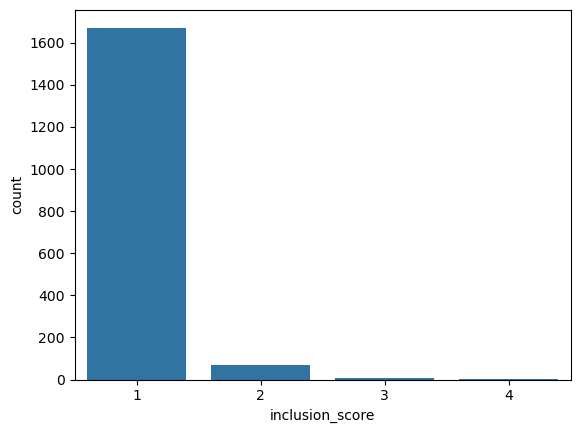

In [49]:
sns.countplot(combined_literature_chembl_w_counts, x="inclusion_score")

In [50]:
combined_literature_chembl_w_counts["action_type"].value_counts()

action_type
substrate    1752
Name: count, dtype: int64